# Full Experiment Aquisition

In [1]:
import ximea_cam_aquire_save as aquire
import run_experiment as runexp
import run_analysis as runana

import imp
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2
import schedule
import time

In [2]:
#settings
subject = 'test_subject'
task = 'test_task'
exp = 'exp'
capture_dir = './capture'
analysis_dir = './analysis'
frames = 30

In [8]:
imp.reload(runexp)
runexp.run_experiment(subject_name=subject, 
                      task_name=task, 
                      exp_type=exp,
                      save_dir=capture_dir,
                      max_frames=frames)

Running an experiment.
Started eyetracking aquisition at 200fps...
Started imu aquisition at 200fps...
Starting scene aquisition at 200fps...
*###*###*###*###*###*Finished PupilLabs Aquisition.
*#Finished Realsense Aquisition.
#####*###*##*##*####*####*##*###*###*####*###*#*##*####*####*#*#####*####*###*###*###*###*###*##Sampled to max num frames of 30
Cleanly Stopping Device Aquisition and closing file.
#Writing Queue of Timestamps
Waiting for save threads to finish
Finished Ximea Aquisition.


()

Running Frame Analysis...
Mean camera time disparity: 0.0084 seconds
Mean OS dts: 0.0312 seconds
Mean OD dts: 0.0317 seconds
Mean CY dts: 0.0309 seconds


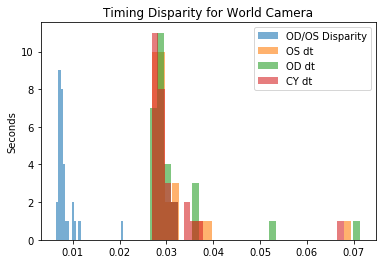

**

In [ ]:
imp.reload(runana)
runana.run_analysis(subject_name=subject, 
                      task_name=task, 
                      exp_type=exp,
                      read_dir=capture_dir,
                      save_dir=analysis_dir
                      )